In [170]:
# Import the required modules
import sqlalchemy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [131]:
# Load the data
dataset_path = 'Data/Airline_Passenger_Satisfaction.csv'
original_data = pd.read_csv(dataset_path)
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
original_data.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               3                4             3                       5   
1               5                4             5                       4   
2               2                2             2                       2   
3               3                4             4                       1   
4               4                1             2                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied

## Utilizes data from SQL

In [132]:
#Load the pandas dataframe to a SQlite database.
# Create an engine to access the sqlite database file
engine=sqlalchemy.create_engine('sqlite:///Database/FlightSatisfaction.sqlite')

In [133]:
# Convert the dataframe to a "data" table in the db.sqlite database
original_data.to_sql('Satisfaction', if_exists='replace', index=False, con=engine)

25976

In [134]:
connection = engine.connect()

In [135]:
# Read data from the Satisfaction table
original_data = pd.read_sql('SELECT * FROM Satisfaction', con=connection)
# Close the connection
connection.close()


In [136]:
original_data

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco              160                      5   
1      Business             2863                      1   
2           Eco              192                      2   
3      Business             3377                      0   
4           Eco             1182                      2   
...         ...              ...                    ...   
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  4               3                4             3   
1                  1               5                4             5   
2                  4               2                2             2   
3                  2               3                4             4   
4                  3               4                1             2   
...              ...             ...              ...           ...   
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974        

## Preprocess Data

In [137]:
#Drop unecessary columns
original_data.drop(["Unnamed: 0","id"],axis=1, inplace=True)


In [138]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [139]:
original_data["Arrival Delay in Minutes"]=original_data["Arrival Delay in Minutes"].fillna(0)

original_data["satisfaction"] = original_data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})

original_data.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              4               3                4   
1                       3              1               5                4   
2                       2              4               2                2   
3                       0              2               3                4   
4                       4              3               4                1   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             3                       5                 5                 5   
1             5                       4                 4                 4   
2             2                       2                 4                 1   
3             4                       1                 1                 1   
4             2                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                          50                      44.0             1  
1                           0                       0.0             1  
2                           0                       0.0             0  
3                           0                       6.0             1  
4                           0                      20.0             1

In [140]:
# Look at the satisfaction value counts
original_data["satisfaction"].value_counts()

satisfaction
0    14573
1    11403
Name: count, dtype: int64

In [141]:
original_data=pd.get_dummies(original_data, columns=["Gender","Customer Type","Type of Travel","Class"]).astype(int)

s_data_scaled = StandardScaler().fit_transform(original_data[["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]])
s_data_scaled[0:5]


array([[ 0.81788702, -1.03517064,  0.95381034,  0.78220768],
       [-0.23923776,  1.67144329, -0.38228641, -0.39218839],
       [-1.29636255, -1.00312786, -0.38228641, -0.39218839],
       [ 0.28932463,  2.18613052, -0.38228641, -0.23204347],
       [ 0.61967612, -0.01180422, -0.38228641,  0.14162801]])

In [142]:
original_data

Age  Flight Distance  Inflight wifi service  \
0       52              160                      5   
1       36             2863                      1   
2       20              192                      2   
3       44             3377                      0   
4       49             1182                      2   
...    ...              ...                    ...   
25971   34              526                      3   
25972   23              646                      4   
25973   17              828                      2   
25974   14             1127                      3   
25975   42              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  4               3                4             3   
1                  1               5                4             5   
2                  4               2                2             2   
3                  2               3                4             4   
4                  3               4                1             2   
...              ...             ...              ...           ...   
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     5                2                 5            5   
1                     4                3                 4            5   
2                     3                2                 2            2   
3                     1                3                 1            4   
4                     2                4                 2            4   
...                 ...              ...               ...          ...   
25971                 4                4                 5            4   
25972                 5                5                 5            4   
25973                 4                5                 4            2   
25974                 5                4                 5            4   
25975                 1           

In [143]:
df_s_scaled=pd.DataFrame(
    s_data_scaled,
    columns=["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]
)
original_data["Age"] =df_s_scaled["Age"]
original_data["Flight Distance"] =df_s_scaled["Flight Distance"]
original_data["Departure Delay in Minutes"] =df_s_scaled["Departure Delay in Minutes"]
original_data["Arrival Delay in Minutes"] =df_s_scaled["Arrival Delay in Minutes"]
original_data.head()

Age  Flight Distance  Inflight wifi service  \
0  0.817887        -1.035171                      5   
1 -0.239238         1.671443                      1   
2 -1.296363        -1.003128                      2   
3  0.289325         2.186131                      0   
4  0.619676        -0.011804                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               3                4             3                       5   
1               5                4             5                       4   
2               2                2             2                       2   
3               3                4             4                       1   
4               4                1             2                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                    0.953810   
1                 4            5                   -0.382286   
2                 2            2                   -0.382286   
3                 1            4                   -0.382286   
4                 2            4                   -0.382286   

   Arrival Delay in Minutes  satisfaction  Gender_Female  Gender_Male  \
0                  0.782208             1              1            0   
1                 -0.392188             1              1            0   
2                 -0.392188             0              0            1   
3                 -0.232043             1              0            1   
4                  0.141628             1              1            0   

   Customer Type_Loyal Customer  Customer Type_disloyal Customer  \
0                             1                                0   
1                             1                                0   
2                             0                                1   
3                             1                                0   
4                             1                                0   

   Type of Travel_Business travel  Type of Travel_Personal Travel  \
0                               1                               0   
1                               1                               0   
2                               1                               0   
3                               1                               0   
4                               1                               0   

   Class_Business  Class_Eco  Class_Eco Plus  
0               0          1               0  
1               1          0               0  
2               0          1               0  
3               1          0               0  
4               0          1               0

In [144]:
X = original_data.drop(columns=['satisfaction'])
y = original_data['satisfaction']

In [145]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Fitting the Logistic Regression Model

In [146]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=78)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

c:\Users\yixua\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)
#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)


In [148]:
# Calculating the confusion matrix
cm1 = confusion_matrix(y_test, testing_predictions)
cm_df1 = pd.DataFrame(
    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score1 = round(accuracy_score(y_test, testing_predictions),5)
precision1 = round(precision_score(y_test, testing_predictions),5)
recall1 = round(recall_score(y_test, testing_predictions),5)
f1_1 = round(f1_score(y_test, testing_predictions),5)

## Evaluate the LR model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [149]:
# Displaying results
print("Confusion Matrix")
display(cm_df1)
print(f"Accuracy Score : {acc_score1}")
print('Precision: ', precision1)
print('Recall: ', recall1)
print('F1 Score: ',f1_1)
print("Classification Report")
print(classification_report(y_test, testing_predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         3280          339
Actual 1          518         2357

Accuracy Score : 0.86803
Precision:  0.87426
Recall:  0.81983
F1 Score:  0.84617
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3619
           1       0.87      0.82      0.85      2875

    accuracy                           0.87      6494
   macro avg       0.87      0.86      0.87      6494
weighted avg       0.87      0.87      0.87      6494



## Fitting the Random Forest Model

In [150]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500,random_state=78)
# Train the model
rf_classifier=rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)


In [157]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score2 = round(accuracy_score(y_test, y_pred_rf),5)
precision2 = round(precision_score(y_test, y_pred_rf),5)
recall2 = round(recall_score(y_test, y_pred_rf),5)
f1_2 = round(f1_score(y_test, y_pred_rf),5)

## Evaluate the RF model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [158]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score2}")
print('Precision: ', precision2)
print('Recall: ', recall2)
print('F1 Score: ',f1_2)
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         3499          120
Actual 1          184         2691

Accuracy Score : 0.95319
Precision:  0.95731
Recall:  0.936
F1 Score:  0.94654
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3619
           1       0.96      0.94      0.95      2875

    accuracy                           0.95      6494
   macro avg       0.95      0.95      0.95      6494
weighted avg       0.95      0.95      0.95      6494



## Feature Importance
In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [113]:
# Get the feature importance array
importances = rf_classifier.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.1669034635455277, 'Online boarding'),
 (0.12750137672566253, 'Inflight wifi service'),
 (0.06509488830750067, 'Type of Travel_Personal Travel'),
 (0.06468950580440182, 'Class_Business'),
 (0.05902208278652241, 'Type of Travel_Business travel'),
 (0.055477533753240216, 'Inflight entertainment'),
 (0.04369882386967867, 'Seat comfort'),
 (0.036107676258855234, 'Ease of Online booking'),
 (0.035706723500669876, 'Class_Eco'),
 (0.03283488270820478, 'Leg room service')]

Text(0, 0.5, 'Feature')

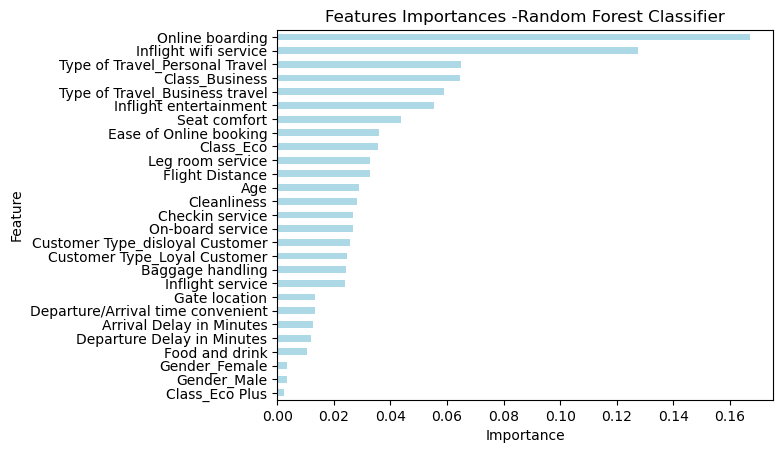

In [114]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh',color='lightblue', title= 'Features Importances -Random Forest Classifier', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')

In [26]:
import xgboost

## Fitting the Xgboost Model

In [115]:
classifier3=xgboost.XGBClassifier(random_state=78)
classifier3=classifier3.fit(X_train,y_train)
y_pred_xb=classifier3.predict(X_test)

In [159]:
# Calculating the confusion matrix
cm3 = confusion_matrix(y_test, y_pred_xb)
cm_df3 = pd.DataFrame(
    cm3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score3 = round(accuracy_score(y_test, y_pred_xb),5)
precision3 = round(precision_score(y_test, y_pred_xb),5)
recall3 = round(recall_score(y_test, y_pred_xb),5)
f1_3 = round(f1_score(y_test, y_pred_xb),5)

## Evaluate the Xgboost model

In [161]:
# Displaying results
print("Confusion Matrix")
display(cm_df3)
print(f"Accuracy Score : {acc_score3}")
print('Precision: ', precision3)
print('Recall: ', recall3)
print('F1 Score: ',f1_3)
print("Classification Report")
print(classification_report(y_test, y_pred_xb))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         3530           89
Actual 1          191         2684

Accuracy Score : 0.95688
Precision:  0.9679
Recall:  0.93357
F1 Score:  0.95042
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3619
           1       0.97      0.93      0.95      2875

    accuracy                           0.96      6494
   macro avg       0.96      0.95      0.96      6494
weighted avg       0.96      0.96      0.96      6494



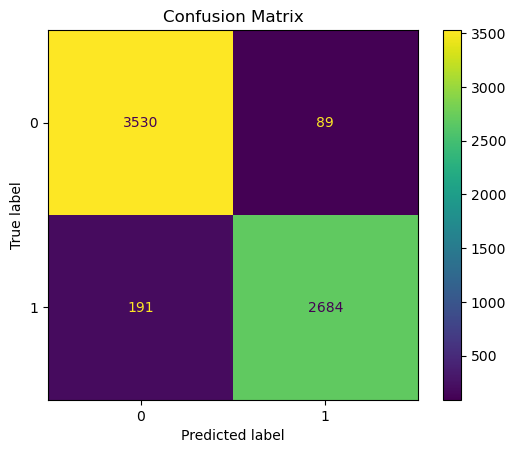

In [188]:
#cmap=plt.cm.YlOrRd
ConfusionMatrixDisplay.from_predictions(y_test , y_pred_xb)
plt.title("Confusion Matrix")

plt.show()


In [30]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [118]:
# Needed for decision tree visualization
from sklearn import tree
import pydotplus
from IPython.display import Image

## Fitting the Decision Tree Model

In [119]:
# Create the decision tree classifier instance
classifier4 = tree.DecisionTreeClassifier(random_state=78)
 # Fit the model
classifier4 = classifier4.fit(X_train, y_train)
# Making predictions using the testing data
y_pred_tr = classifier4.predict(X_test)

## Evaluate the Tree model

In [162]:
# Calculating the confusion matrix
cm4 = confusion_matrix(y_test, y_pred_tr)
cm_df4 = pd.DataFrame(
    cm4, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score4 = round(accuracy_score(y_test, y_pred_tr),5)
precision4 = round(precision_score(y_test, y_pred_tr),5)
recall4 = round(recall_score(y_test, y_pred_tr),5)
f1_4 = round(f1_score(y_test, y_pred_tr),5)

In [163]:
# Displaying results
print("Confusion Matrix")
display(cm_df4)
print(f"Accuracy Score : {acc_score4}")
print('Precision: ', precision4)
print('Recall: ', recall4)
print('F1 Score: ',f1_4)
print("Classification Report")
print(classification_report(y_test, y_pred_tr))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         3389          230
Actual 1          232         2643

Accuracy Score : 0.92886
Precision:  0.91994
Recall:  0.9193
F1 Score:  0.91962
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3619
           1       0.92      0.92      0.92      2875

    accuracy                           0.93      6494
   macro avg       0.93      0.93      0.93      6494
weighted avg       0.93      0.93      0.93      6494



In [122]:
# Create DOT data
dot_data = tree.export_graphviz(
    classifier4, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.640919 to fit



In [164]:
precision_scores=[precision1,precision4,precision2,precision3]
recall_scores = [recall1,recall4,recall2,recall3]
f1_scores = [f1_1, f1_4,f1_2, f1_3]
accuracy_scores=[acc_score1,acc_score4,acc_score2,acc_score3]
Model=['Logistic Regression','Decision Tree','Random Forest','XGBoost']
evaluation_df= pd.DataFrame(list(zip( Model, precision_scores, recall_scores, f1_scores, accuracy_scores)),
            columns =["MODEL", "PRECISION", "RECALL", "F1_SCORE", "ACCURACY"])
evaluation_df.set_index("MODEL",inplace=True)
evaluation_df

PRECISION   RECALL  F1_SCORE  ACCURACY
MODEL                                                      
Logistic Regression    0.87426  0.81983   0.84617   0.86803
Decision Tree          0.91994  0.91930   0.91962   0.92886
Random Forest          0.95731  0.93600   0.94654   0.95319
XGBoost                0.96790  0.93357   0.95042   0.95688